Spaceship titanic

Team Details

Priyanshu K - 441 - 01fe21bcs244

Vasundhara - 442 - 01fe21bcs245

Bhavana - 444

Sheldon-445

Problem Definition

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system. The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")

In [4]:
train_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data.corr(numeric_only = True)
#correlation

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


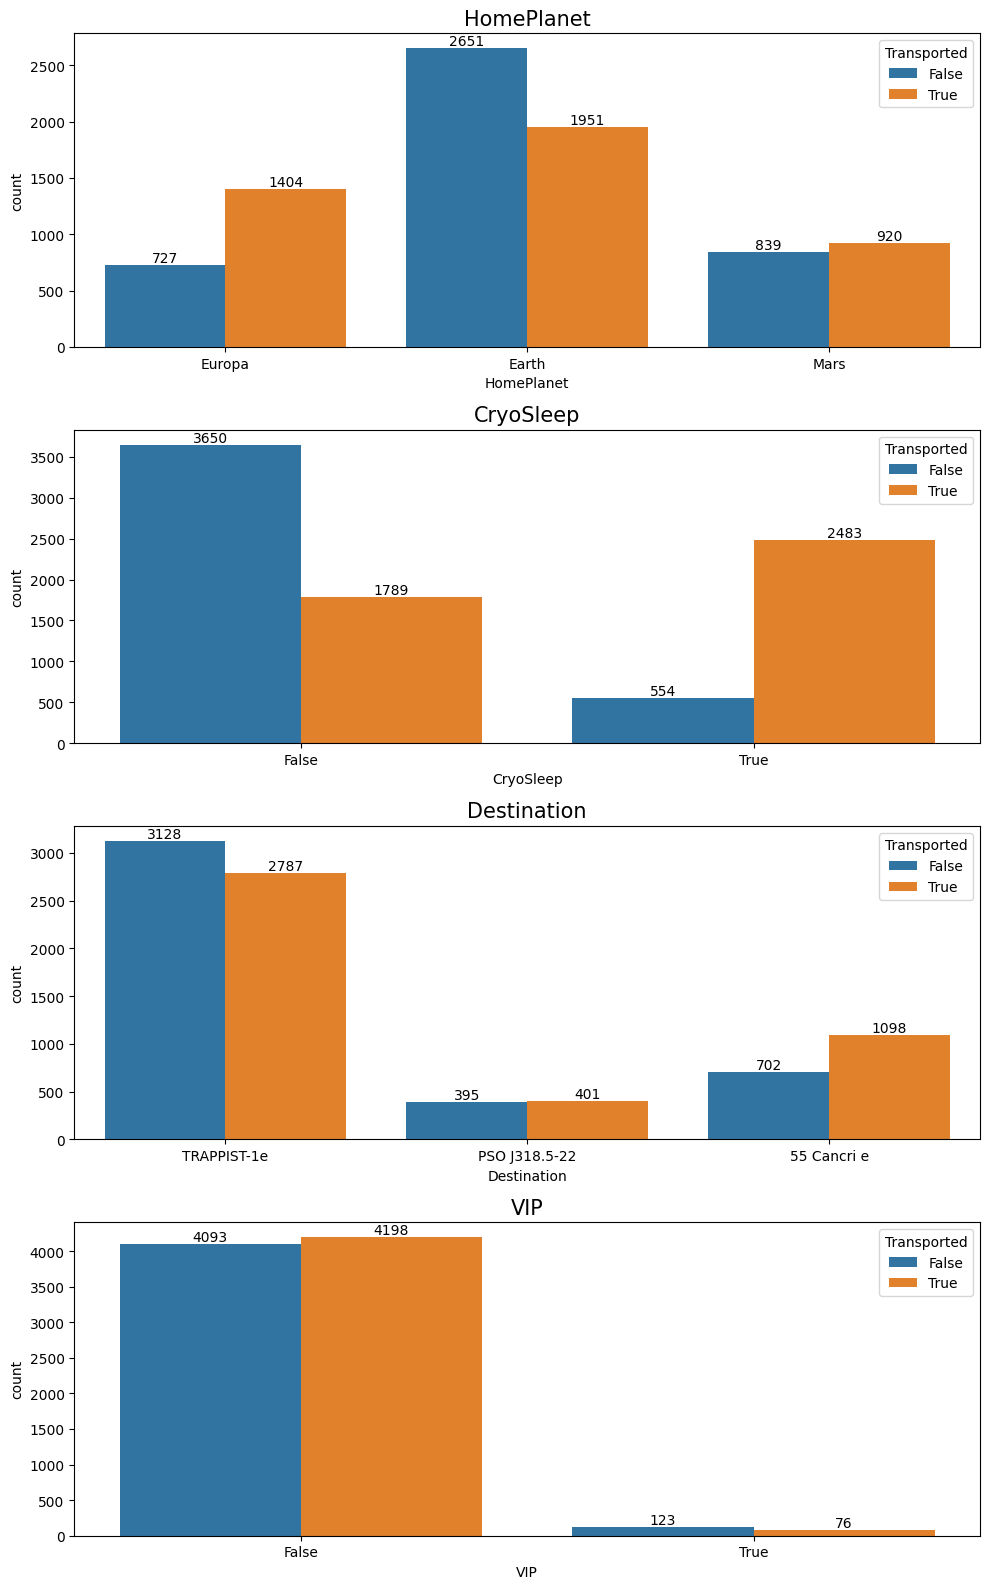

In [8]:
# We plotted the countplots of the "categorical" ones with the for loop.

cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,16))

for i, var_name in enumerate(cat_features):   # We can also say "r" instead of "var_name".

    ax=plt.subplot(len(cat_features),1,i+1)   #It also works with ax=fig.add_subplot(..).

    sb.countplot(data=train_data, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name, fontsize = 15)     # for title
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])            # It makes 2 columns because we gave hue a 2-variable. We want them both to write numbers on it.

fig.tight_layout()
plt.show()

In [9]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [10]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [12]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [13]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [14]:
train_data['Name'].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [15]:
train_data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [16]:
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [17]:
train_data[['Deck', 'Cabin_number', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Cabin_number', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

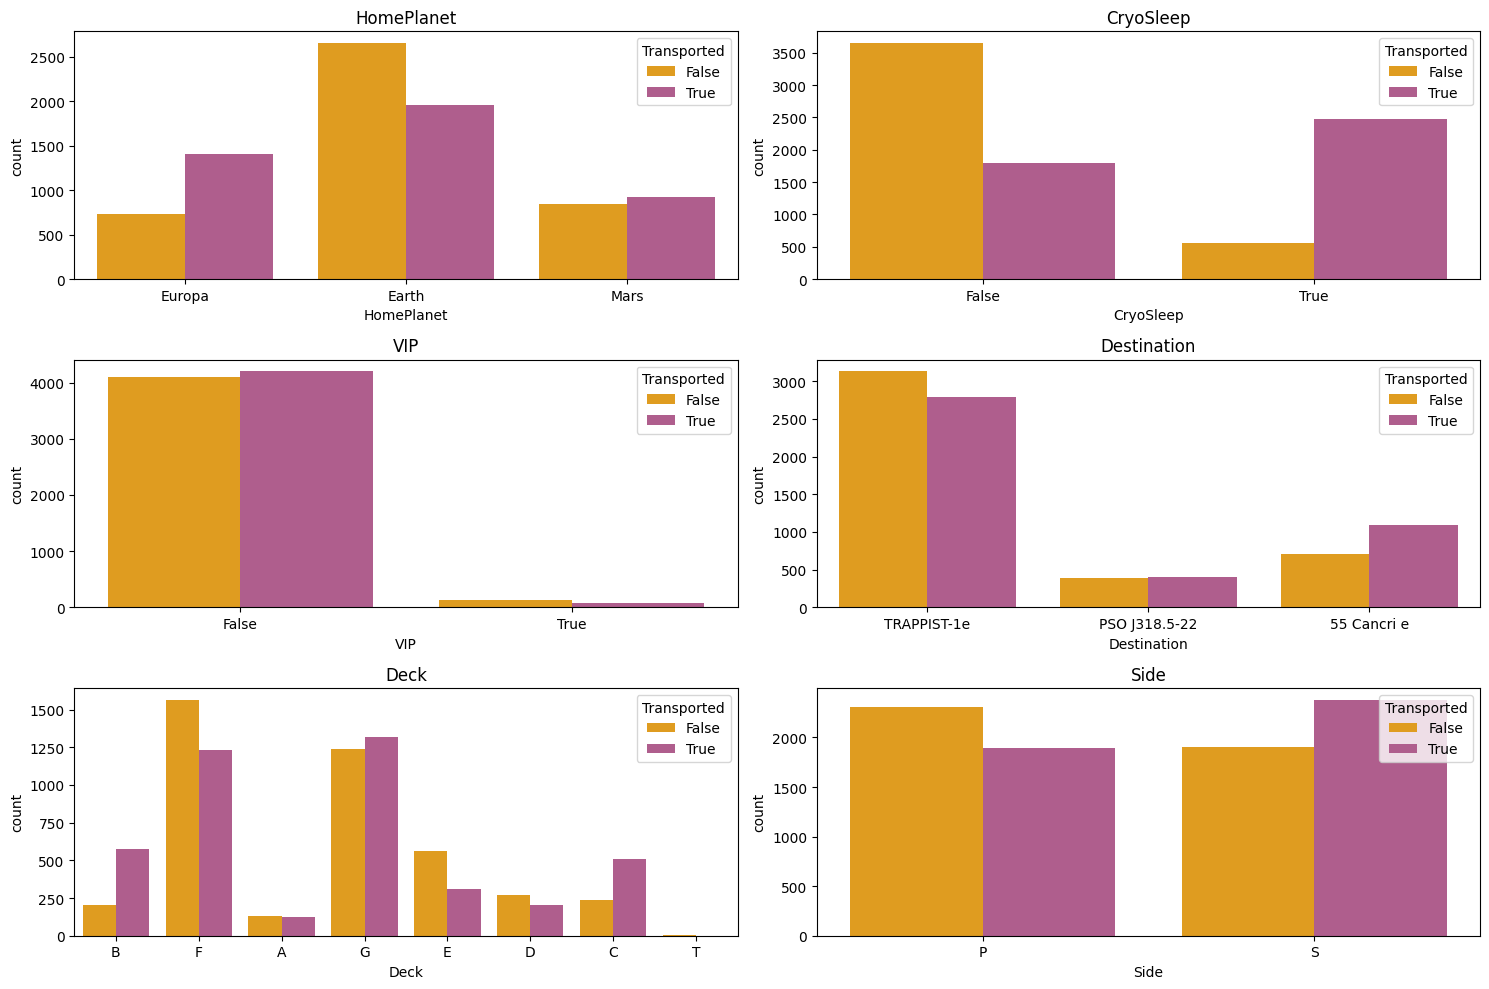

In [18]:
categorical_columns = ['HomePlanet', 'CryoSleep', 'VIP','Destination','Deck', 'Side']
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = ['#ffa600', '#bc5090']

fig, ax = plt.subplots(len(categorical_columns)//2, 2, figsize=(15, 10))

for i, column in enumerate(train_data[categorical_columns].columns):
    sns.countplot(x=train_data[column], hue=train_data['Transported'], ax=ax[i // 2, i % 2],palette=custom_palette)
    ax[i // 2, i % 2].set_title(column)

# # If there are an odd number of categorical columns, remove the empty subplot
# if len(categorical_columns) % 2 != 0:
#     fig.delaxes(ax[len(categorical_columns) // 2, 1])

plt.tight_layout()
plt.show()

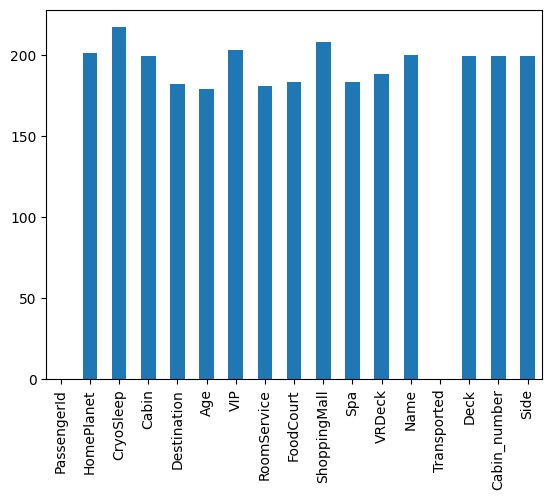

In [19]:
train_data.isnull().sum().plot.bar()
plt.show()

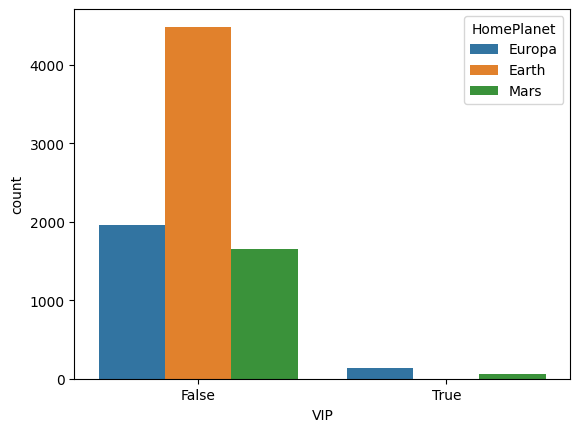

In [20]:
sb.countplot(data=train_data, x='VIP',
			hue='HomePlanet')
plt.show()

<Axes: >

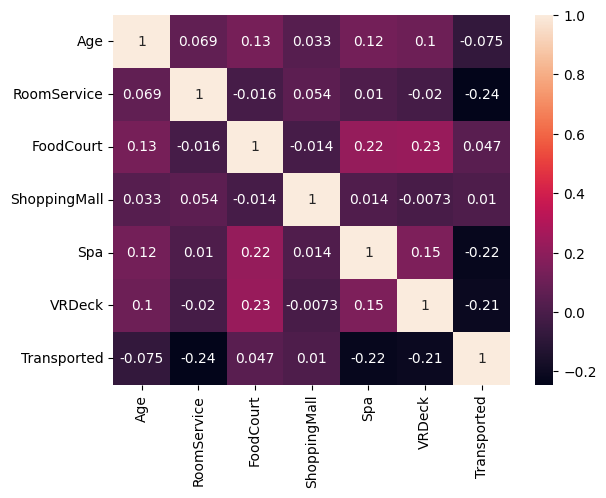

In [21]:
sb.heatmap(train_data.corr(numeric_only = True), annot = True)

<Axes: xlabel='Transported', ylabel='Age'>

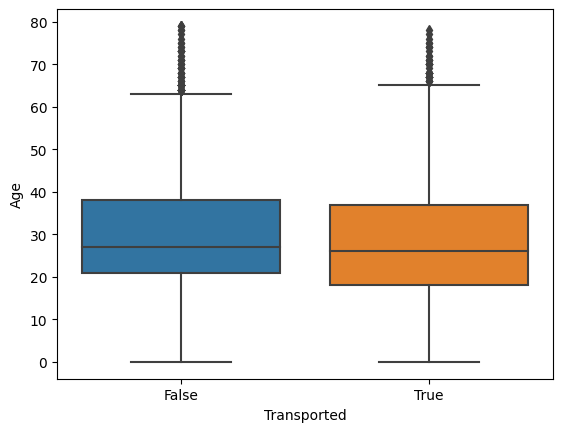

In [22]:
sb.boxplot(train_data, x = 'Transported', y = 'Age')

In [23]:
test_null = pd.DataFrame(test_data.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(train_data.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]


fig = make_subplots(rows=1,
                    cols=2,
                    column_titles = ["Train Data", "Test Data"] ,
                    x_title="Missing Values")

fig.add_trace(go.Bar(x=train_null[0],
                     y=train_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)],
                                line_color='rgb(0,0,0)' ,
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=test_null[0],
                     y=test_null.index,
                     orientation="h",
                    marker=dict(color=[n for n in range(12)],
                                line_color='rgb(0,0,0)',
                                line_width = 2,
                                coloraxis="coloraxis")),
              1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution", title_x=0.5)

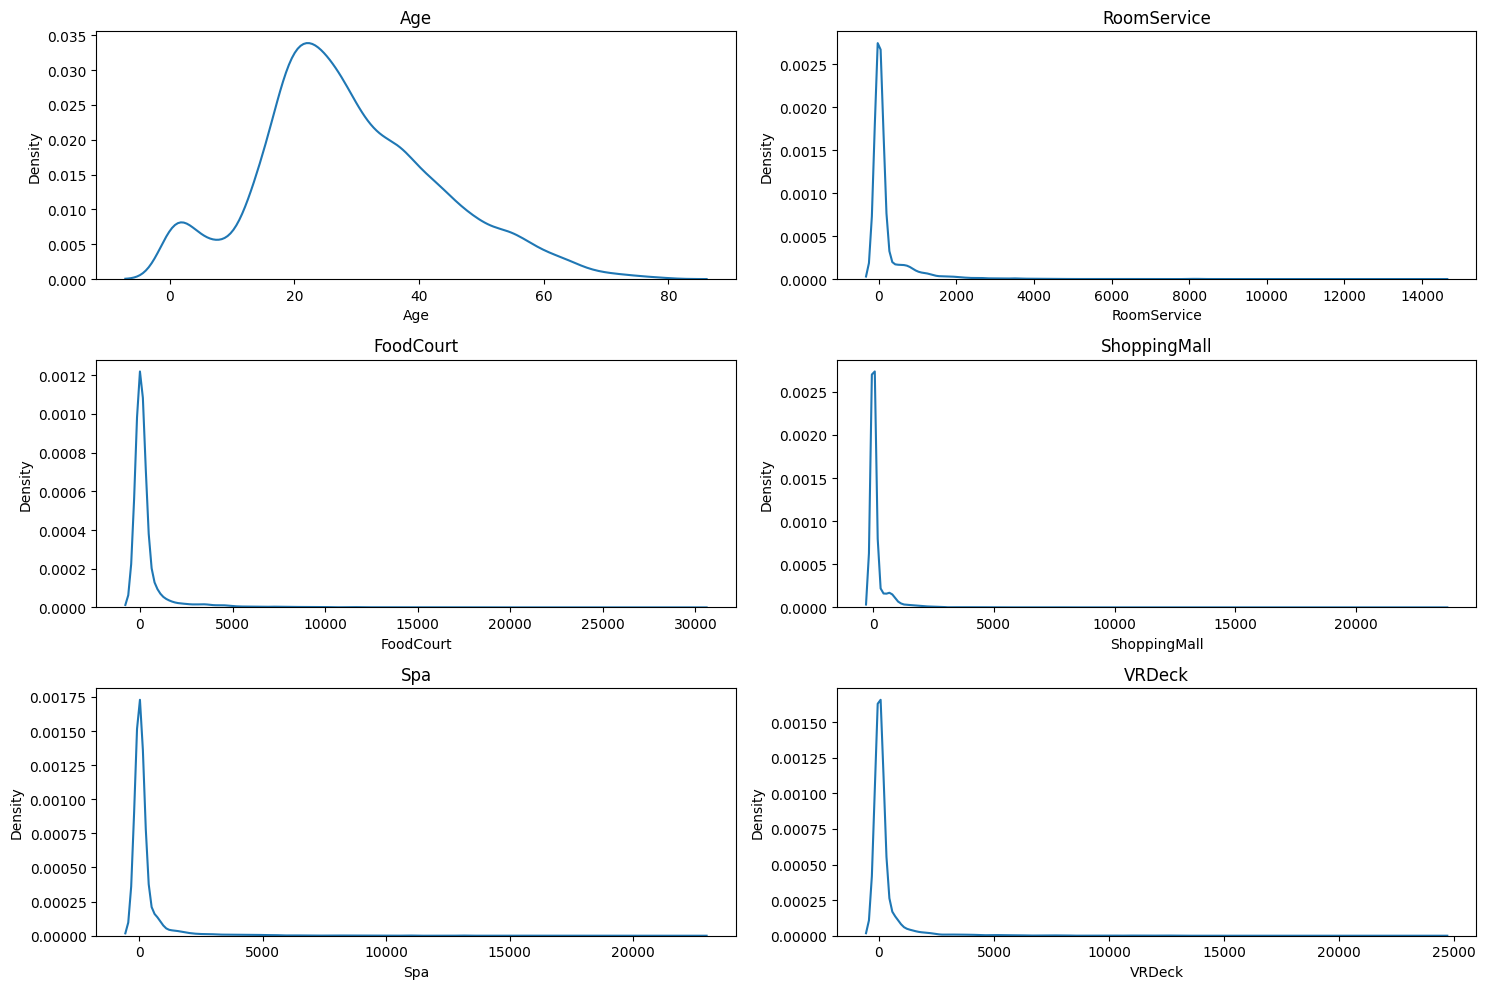

In [24]:
numerical_columns = train_data.select_dtypes(include=[float, int]).columns



fig,ax = plt.subplots(len(numerical_columns)//2,2,figsize=(15,10))
for i,column in enumerate(train_data[numerical_columns]):
    sns.kdeplot(x = train_data[column], ax = ax[i//2,i%2])
    ax[i//2,i%2].set_title(column)
plt.tight_layout()
plt.show()

In [25]:
train_data['Cabin_number'].value_counts()

82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: Cabin_number, Length: 1817, dtype: int64

In [26]:
train_data['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [27]:
train_data['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [28]:
train_data = train_data.drop(['Cabin_number'], axis = 1)
test_data = test_data.drop(['Cabin_number'], axis = 1)

In [29]:
train_data.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)
test_data.drop(['Cabin', 'Name', 'PassengerId'], axis = 1, inplace = True)

In [30]:
train_data[['VIP', 'CryoSleep']] = train_data[['VIP', 'CryoSleep']].fillna(value=0)
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

# Then change the boolean values with numerical values
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)

test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)
test_data['VIP'] = test_data['VIP'].astype(int)

In [31]:
# Here I created two lists that contain the names of the numerical and categorical attributes
num_features = [col for col in train_data.columns if train_data[col].dtype == "int64" or train_data[col].dtype == "float64"]
cat_features = [col for col in train_data.columns if train_data[col].dtype == "object"]

for feature in num_features:
  train_data[feature].fillna(train_data[feature].median(), inplace = True)
  test_data[feature].fillna(test_data[feature].median(), inplace = True)

for feature in cat_features:
  train_data[feature].fillna(train_data[feature].mode().iloc[0], inplace = True)
  test_data[feature].fillna(test_data[feature].mode().iloc[0], inplace = True)

In [32]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S


In [33]:
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Side            0
dtype: int64

In [34]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S


In [35]:
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
train_data["Deck"] = train_data["Deck"].replace(deck_mapping)
test_data["Deck"] = test_data["Deck"].replace(deck_mapping)

In [36]:
train_data = pd.get_dummies(train_data).copy()
test_data = pd.get_dummies(test_data).copy()

In [37]:
train_data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,2,0,1,0,0,0,1,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,6,1,0,0,0,0,1,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,1,0,1,0,0,0,1,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,1,0,0,0,1,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,6,1,0,0,0,0,1,0,1


In [38]:
from sklearn.model_selection import train_test_split

# We create a separate variable that contains the labels and then erase them from our data
y = train_data.Transported.copy()
train_data = train_data.drop(['Transported'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.2)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svm_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(svm_pred, y_test)

svc_accuracy

0.7906843013225991

In [41]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_accuracy = accuracy_score(sgd_pred, y_test)

sgd_accuracy

0.7044278320874066

In [42]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(decision_tree_pred, y_test)

decision_tree_accuracy

0.7446808510638298

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(random_forest_pred, y_test)

random_forest_accuracy

0.780333525014376

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(gbc_pred, y_test)

gbc_accuracy

0.7975848188614146

In [45]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Stochastic Gradient Decent', 'Decision Tree','Random Forest',
              'GradientBoostingClassifier'],
    'Accuracy': [svc_accuracy, sgd_accuracy, decision_tree_accuracy, random_forest_accuracy, gbc_accuracy]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,GradientBoostingClassifier,0.797585
0,Support Vector Machines,0.790684
3,Random Forest,0.780334
2,Decision Tree,0.744681
1,Stochastic Gradient Decent,0.704428


In [46]:

pred=gbc.predict(test_data)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds ==y_test ).sum().astype(float) / len(preds)*100
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 77.23


In [48]:
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression()
lre.fit(X_train,y_train)
lg_pred_y = lre.predict(X_test)
print(accuracy_score(y_test.values, lg_pred_y))

0.7866589994249569


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

